In [8]:
# import base
import tensorflow as tf
import os

In [9]:
print("python version: ", sys.version)
print("tf version: ", tf.__version__)
print("devices: ", tf.config.list_physical_devices())

python version:  3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
tf version:  2.10.1
devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
# load model
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow_hub import KerasLayer
import pandas as pd

model = load_model('model.h5')

In [11]:
# pipeline datasets
# create train and validation datasets
batch_size = 128
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

Found 16041 files belonging to 2 classes.
Using 12833 files for training.
Found 16041 files belonging to 2 classes.
Using 3208 files for validation.


In [12]:
# get classes
train_ds.class_names

['car', 'not_car']

In [13]:
# configure for performance
autotune = tf.data.AUTOTUNE

def rsize(image, label):
    image = tf.image.resize(image, (224, 224))
    return image, label

train_ds = train_ds.map(rsize, num_parallel_calls=autotune)
val_ds = val_ds.map(rsize, num_parallel_calls=autotune)

train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [14]:
# train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
101/101 [==============================] - 78s 744ms/step - loss: 0.1602 - accuracy: 0.9417 - val_loss: 0.1810 - val_accuracy: 0.9305
Epoch 2/10
101/101 [==============================] - 74s 729ms/step - loss: 0.1296 - accuracy: 0.9523 - val_loss: 0.1805 - val_accuracy: 0.9364
Epoch 3/10
101/101 [==============================] - 70s 691ms/step - loss: 0.0952 - accuracy: 0.9673 - val_loss: 0.2803 - val_accuracy: 0.9009
Epoch 4/10
101/101 [==============================] - 70s 692ms/step - loss: 0.0948 - accuracy: 0.9652 - val_loss: 0.2649 - val_accuracy: 0.9049
Epoch 5/10
101/101 [==============================] - 70s 693ms/step - loss: 0.1251 - accuracy: 0.9505 - val_loss: 0.2513 - val_accuracy: 0.9137
Epoch 6/10
101/101 [==============================] - 70s 693ms/step - loss: 0.0811 - accuracy: 0.9709 - val_loss: 0.2426 - val_accuracy: 0.9320
Epoch 7/10
101/101 [==============================] - 70s 693ms/step - loss: 0.0676 - accuracy: 0.9754 - val_loss: 0.2743 - val_ac

In [17]:
# save model
import pandas as pd

# switch to testing moode
model.trainable = False

model.save('model.h5')
hist_df = pd.DataFrame(history.history)
with open("hist.json", "w") as f:
    hist_df.to_json(f)

import tensorflowjs as tfjs
# save to tensorflowjs
tfjs.converters.save_keras_model(model, "model_tfjs.json")


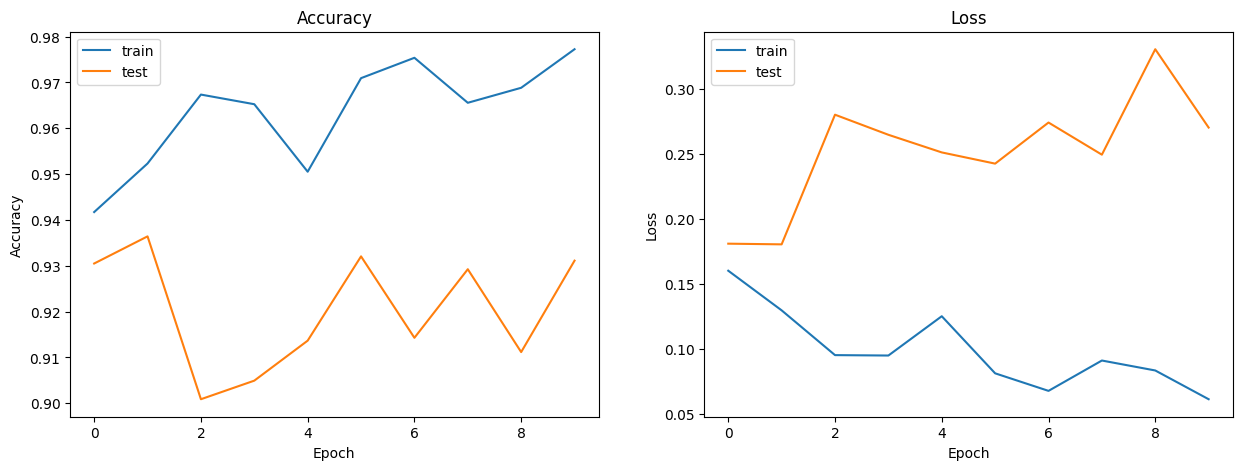

In [16]:
# visualize model
#plot accuracy and val_accuracy
import matplotlib.pyplot as plt
import pandas as pd

model_hist = pd.read_json("hist.json")
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title("Accuracy")
axes[0].plot(model_hist['accuracy'], label='train')
axes[0].plot(model_hist['val_accuracy'], label = 'test')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')
# plot loss and val_loss
axes[1].set_title("Loss")
axes[1].plot(model_hist['loss'], label='train')
axes[1].plot(model_hist['val_loss'], label = 'test')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

plt.show()